# Introduction
The following notebook demonstrates the following:  
* [ ] Train OLS model
* [ ] Validate assumptions for OLS

**NOTE**: The purpose of this notebook is to quickly refer to this set for specific validations and visualizations. It does not bother to do a train/test split. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from src.utils import import_dataset, get_column_by_type

In [2]:
dat = import_dataset()

In [3]:
# get all numeric columns
dat = get_column_by_type(dat, object, exclude=True)
dat.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [4]:
y = dat['mpg']
X = dat.loc[:, dat.columns != 'mpg']

# Using sklearn's LinearRegression model

In [5]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
print(model.coef_)

[-3.29859089e-01  7.67843024e-03 -3.91355574e-04 -6.79461791e-03
  8.52732469e-02  7.53367180e-01]


In [7]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
cylinders,-0.329859
displacement,0.007678
horsepower,-0.000391
weight,-0.006795
acceleration,0.085273
year,0.753367


Mean Squared Error from model is 11.590170981415227


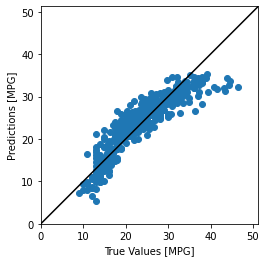

In [17]:
def compare_predictions(y_test, y_pred):
    """Plot predictions in regression"""
    a = plt.axes(aspect='equal')
    plt.scatter(y, y_pred)
    plt.xlabel("True Values [MPG]")
    plt.ylabel("Predictions [MPG]")
    lims = [0, y_test.max()*1.1]
    plt.xlim(lims)
    plt.ylim(lims)
    plt.plot(lims, lims, color='black')
    print(f"Mean Squared Error from model is {mean_squared_error(y_test, y_pred)}")
    return

compare_predictions(y, model.predict(X))

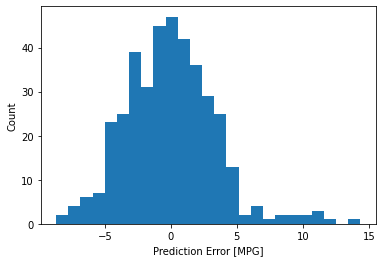

In [9]:
def plot_error(y_test, y_pred):
    error = y_test - y_pred
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [MPG]')
    plt.ylabel('Count')
    return
plot_error(y, model.predict(X))

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

X_col = calculate_vif_(X)

dropping 'weight' at index: 3
dropping 'cylinders' at index: 0
Remaining variables:
Index(['displacement', 'horsepower', 'acceleration', 'year'], dtype='object')


Mean Squared Error from model is 14.833754015461796


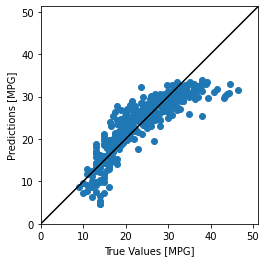

In [20]:
model_col = LinearRegression()
model_col.fit(X_col, y)
compare_predictions(y, model_col.predict(X_col))